# Code to Classify MNIST using ANN and CNN

## Ref: https://machinelearningmastery.com/handwritten-digit-recognition-using-convolutional-neural-networks-python-keras/

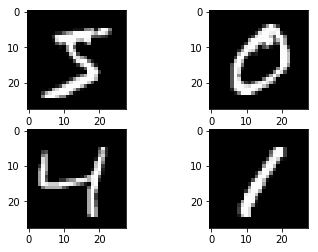

In [4]:
# Plot ad hoc mnist instances
from keras.datasets import mnist
import matplotlib.pyplot as plt
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [5]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

In [3]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [37]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [38]:
from sklearn.model_selection import train_test_split
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.33, random_state=seed)

In [39]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_val = X_val.reshape(X_val.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [40]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_val = X_val / 255
X_test = X_test / 255

In [ ]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)
y_test = np_utils.to_categorical(y_test)
num_classes = y_val.shape[1]

## Fully Connected Neural Network

In [42]:
# define baseline model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
	model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [43]:
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 6700 samples
Epoch 1/10
 - 10s - loss: 0.2762 - acc: 0.9199 - val_loss: 0.1438 - val_acc: 0.9584
Epoch 2/10
 - 9s - loss: 0.1093 - acc: 0.9684 - val_loss: 0.0889 - val_acc: 0.9731
Epoch 3/10
 - 9s - loss: 0.0707 - acc: 0.9797 - val_loss: 0.0765 - val_acc: 0.9755
Epoch 4/10
 - 9s - loss: 0.0499 - acc: 0.9855 - val_loss: 0.0702 - val_acc: 0.9785
Epoch 5/10
 - 10s - loss: 0.0358 - acc: 0.9898 - val_loss: 0.0630 - val_acc: 0.9784
Epoch 6/10
 - 9s - loss: 0.0250 - acc: 0.9936 - val_loss: 0.0645 - val_acc: 0.9804
Epoch 7/10
 - 9s - loss: 0.0193 - acc: 0.9950 - val_loss: 0.0576 - val_acc: 0.9800
Epoch 8/10
 - 9s - loss: 0.0142 - acc: 0.9970 - val_loss: 0.0564 - val_acc: 0.9830
Epoch 9/10
 - 10s - loss: 0.0113 - acc: 0.9974 - val_loss: 0.0653 - val_acc: 0.9799
Epoch 10/10
 - 9s - loss: 0.0079 - acc: 0.9984 - val_loss: 0.0562 - val_acc: 0.9830
Baseline Error: 1.88%


In [60]:
pred = model.predict(X_test)

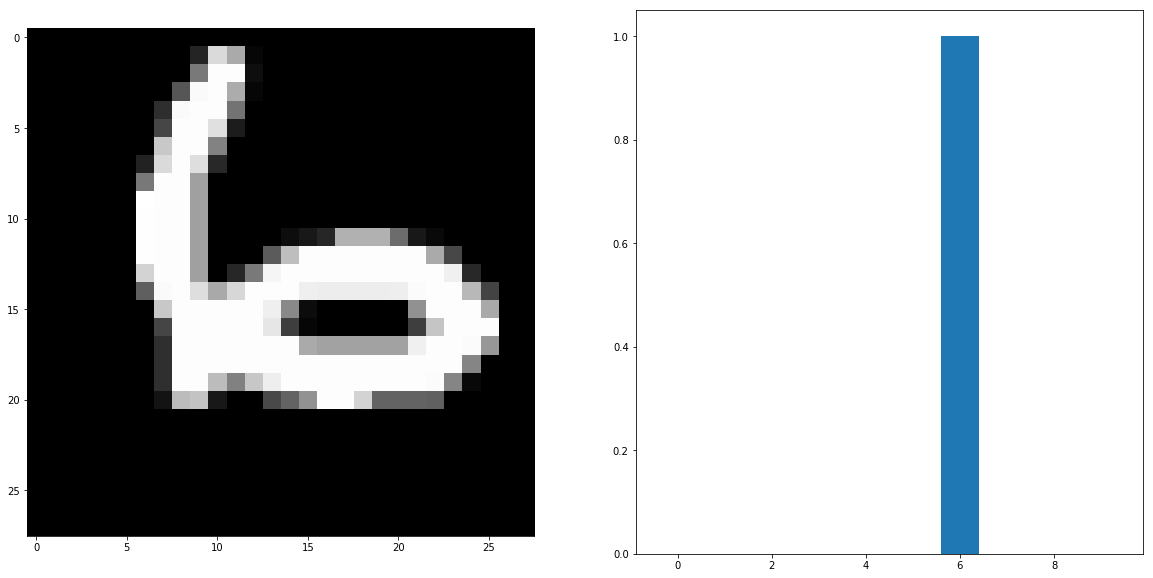

In [117]:
f, (ax1, ax2) = plt.subplots(1,2, figsize = (20,10))
index = 50
ax1.imshow(X_test[index].reshape(28,28), cmap = 'gray')
ax2.bar([0,1,2,3,4,5,6,7,8,9], pred[index])
plt.show()

In [113]:
w = model.layers[0].get_weights()[0]

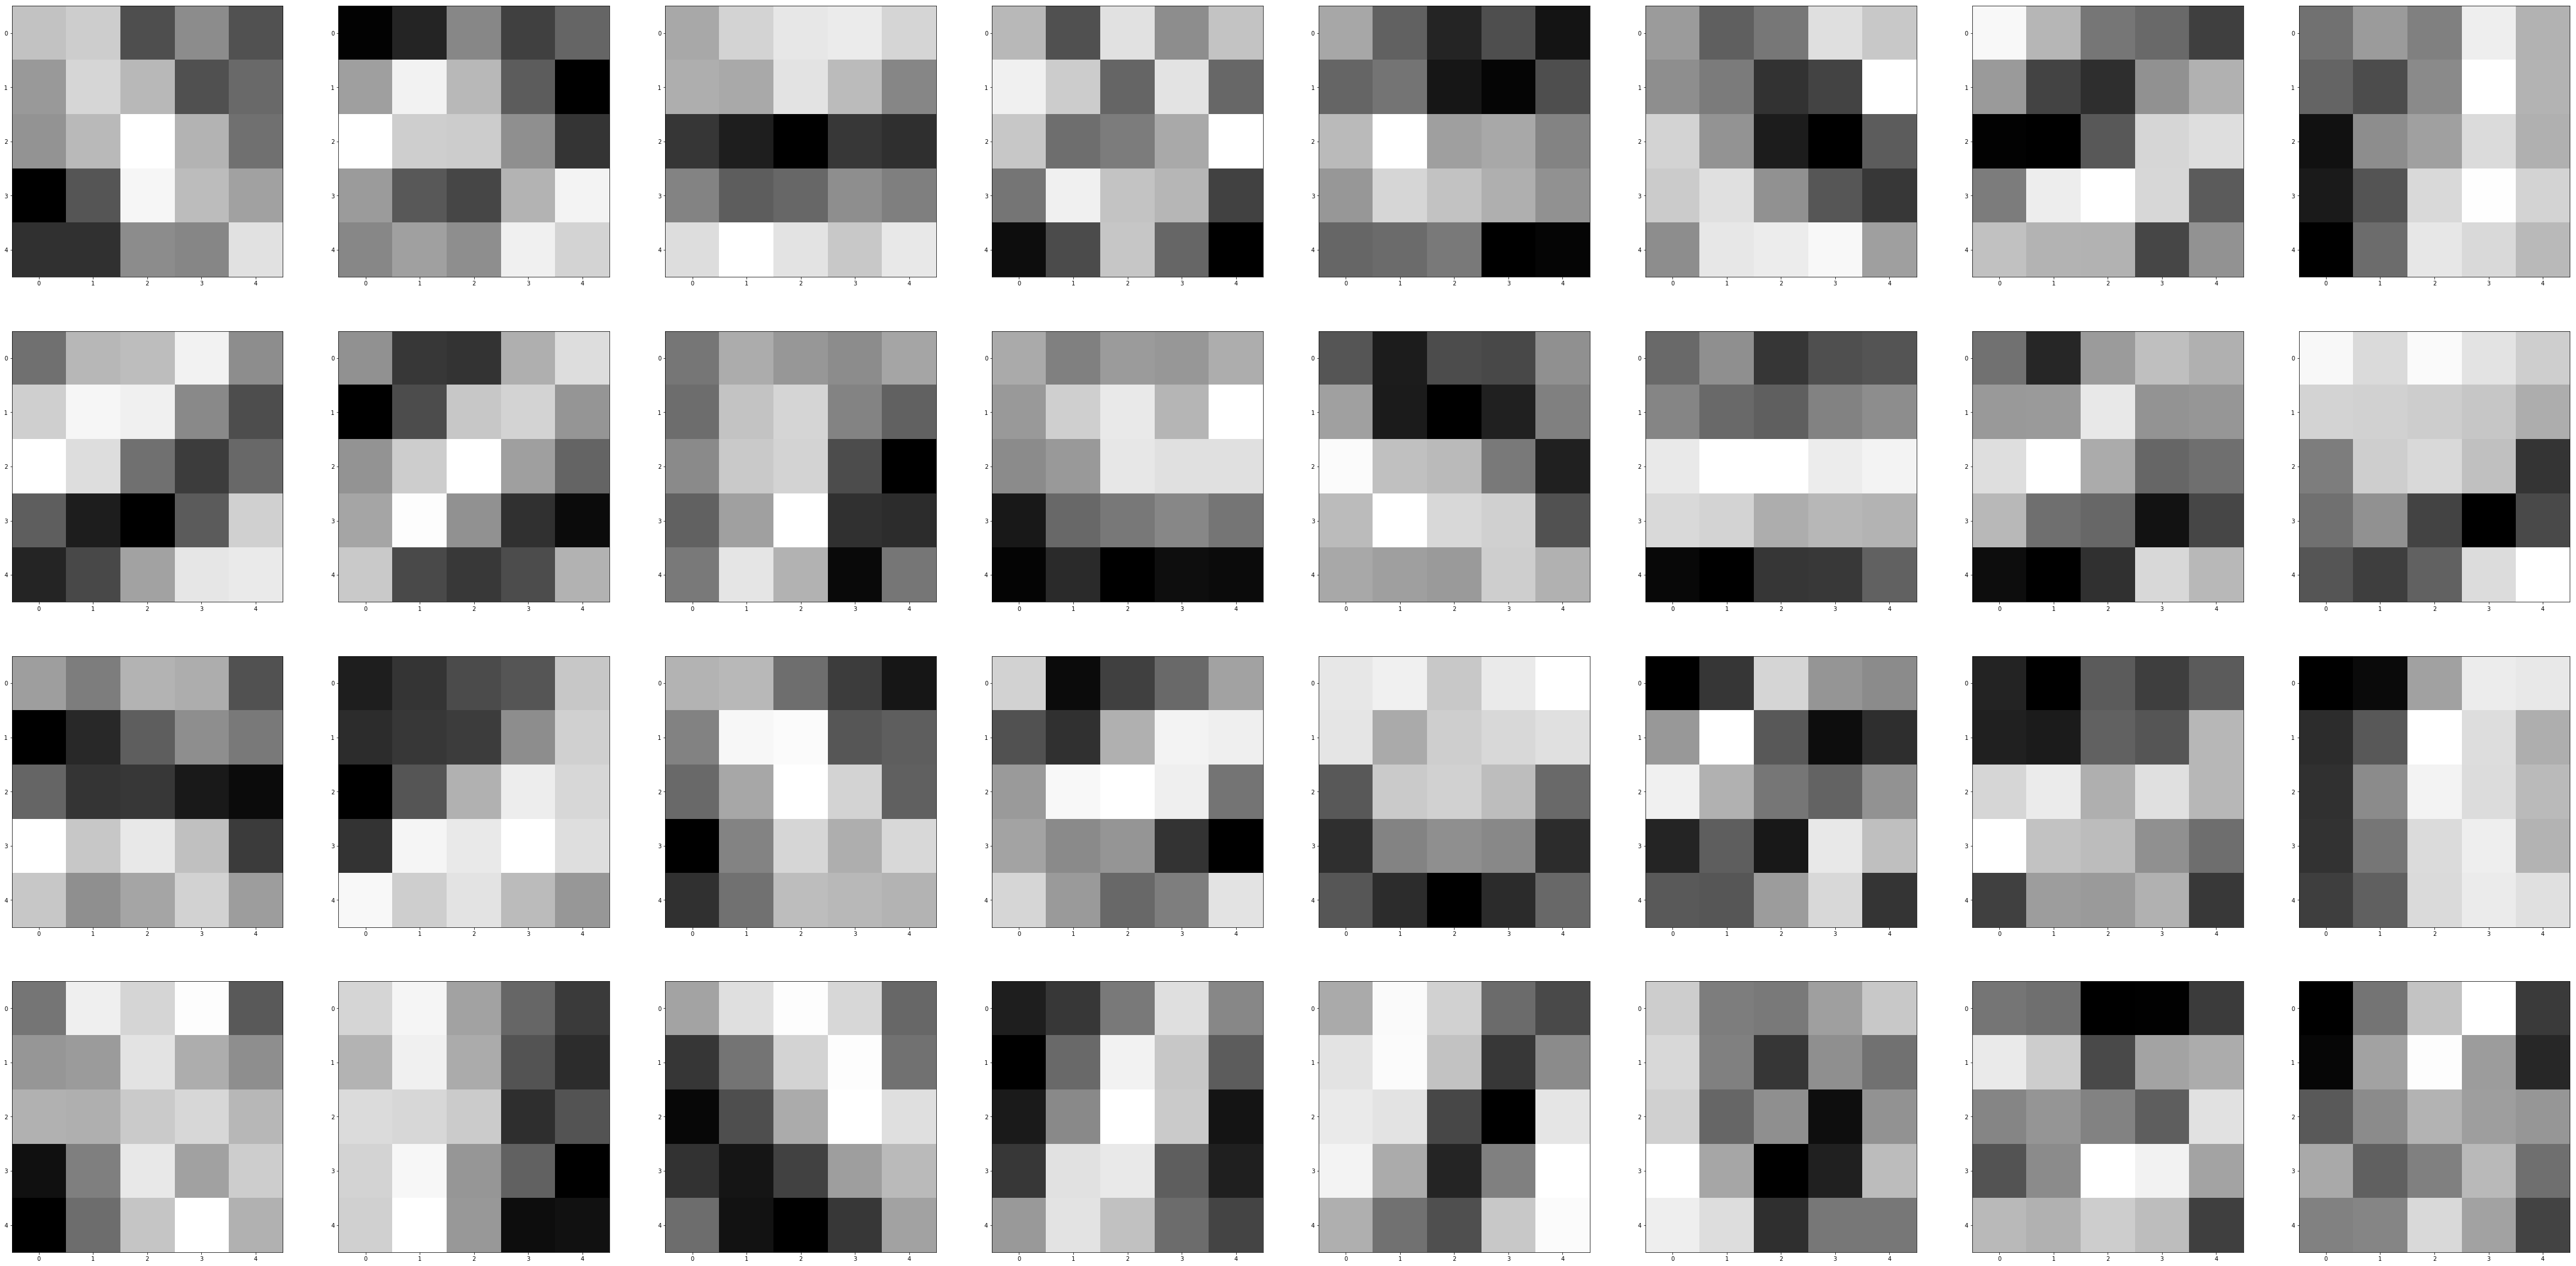

In [114]:
f, ax = plt.subplots(4,8, figsize = (80,40))
for i in range(4):
    for j in range(8):
        ax[i][j].imshow(w[:,:,0,i*8+j], cmap = 'gray')
plt.show()

In [88]:
# visualizing feature maps of the CNN
from keras import models
layer_outputs = [layer.output for layer in model.layers[:12]] 
# Extracts the outputs of the top 12 layers
activation_model = models.Model(inputs=model.input, outputs=layer_outputs) # Creates a model that will return these outputs, given the model input

In [90]:
activations = activation_model.predict(X_test) 
# Returns a list of five Numpy arrays: one array per layer activation

In [91]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(3300, 32, 24, 24)


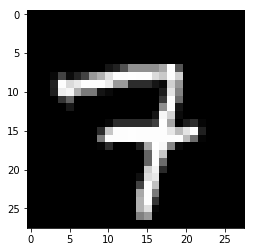

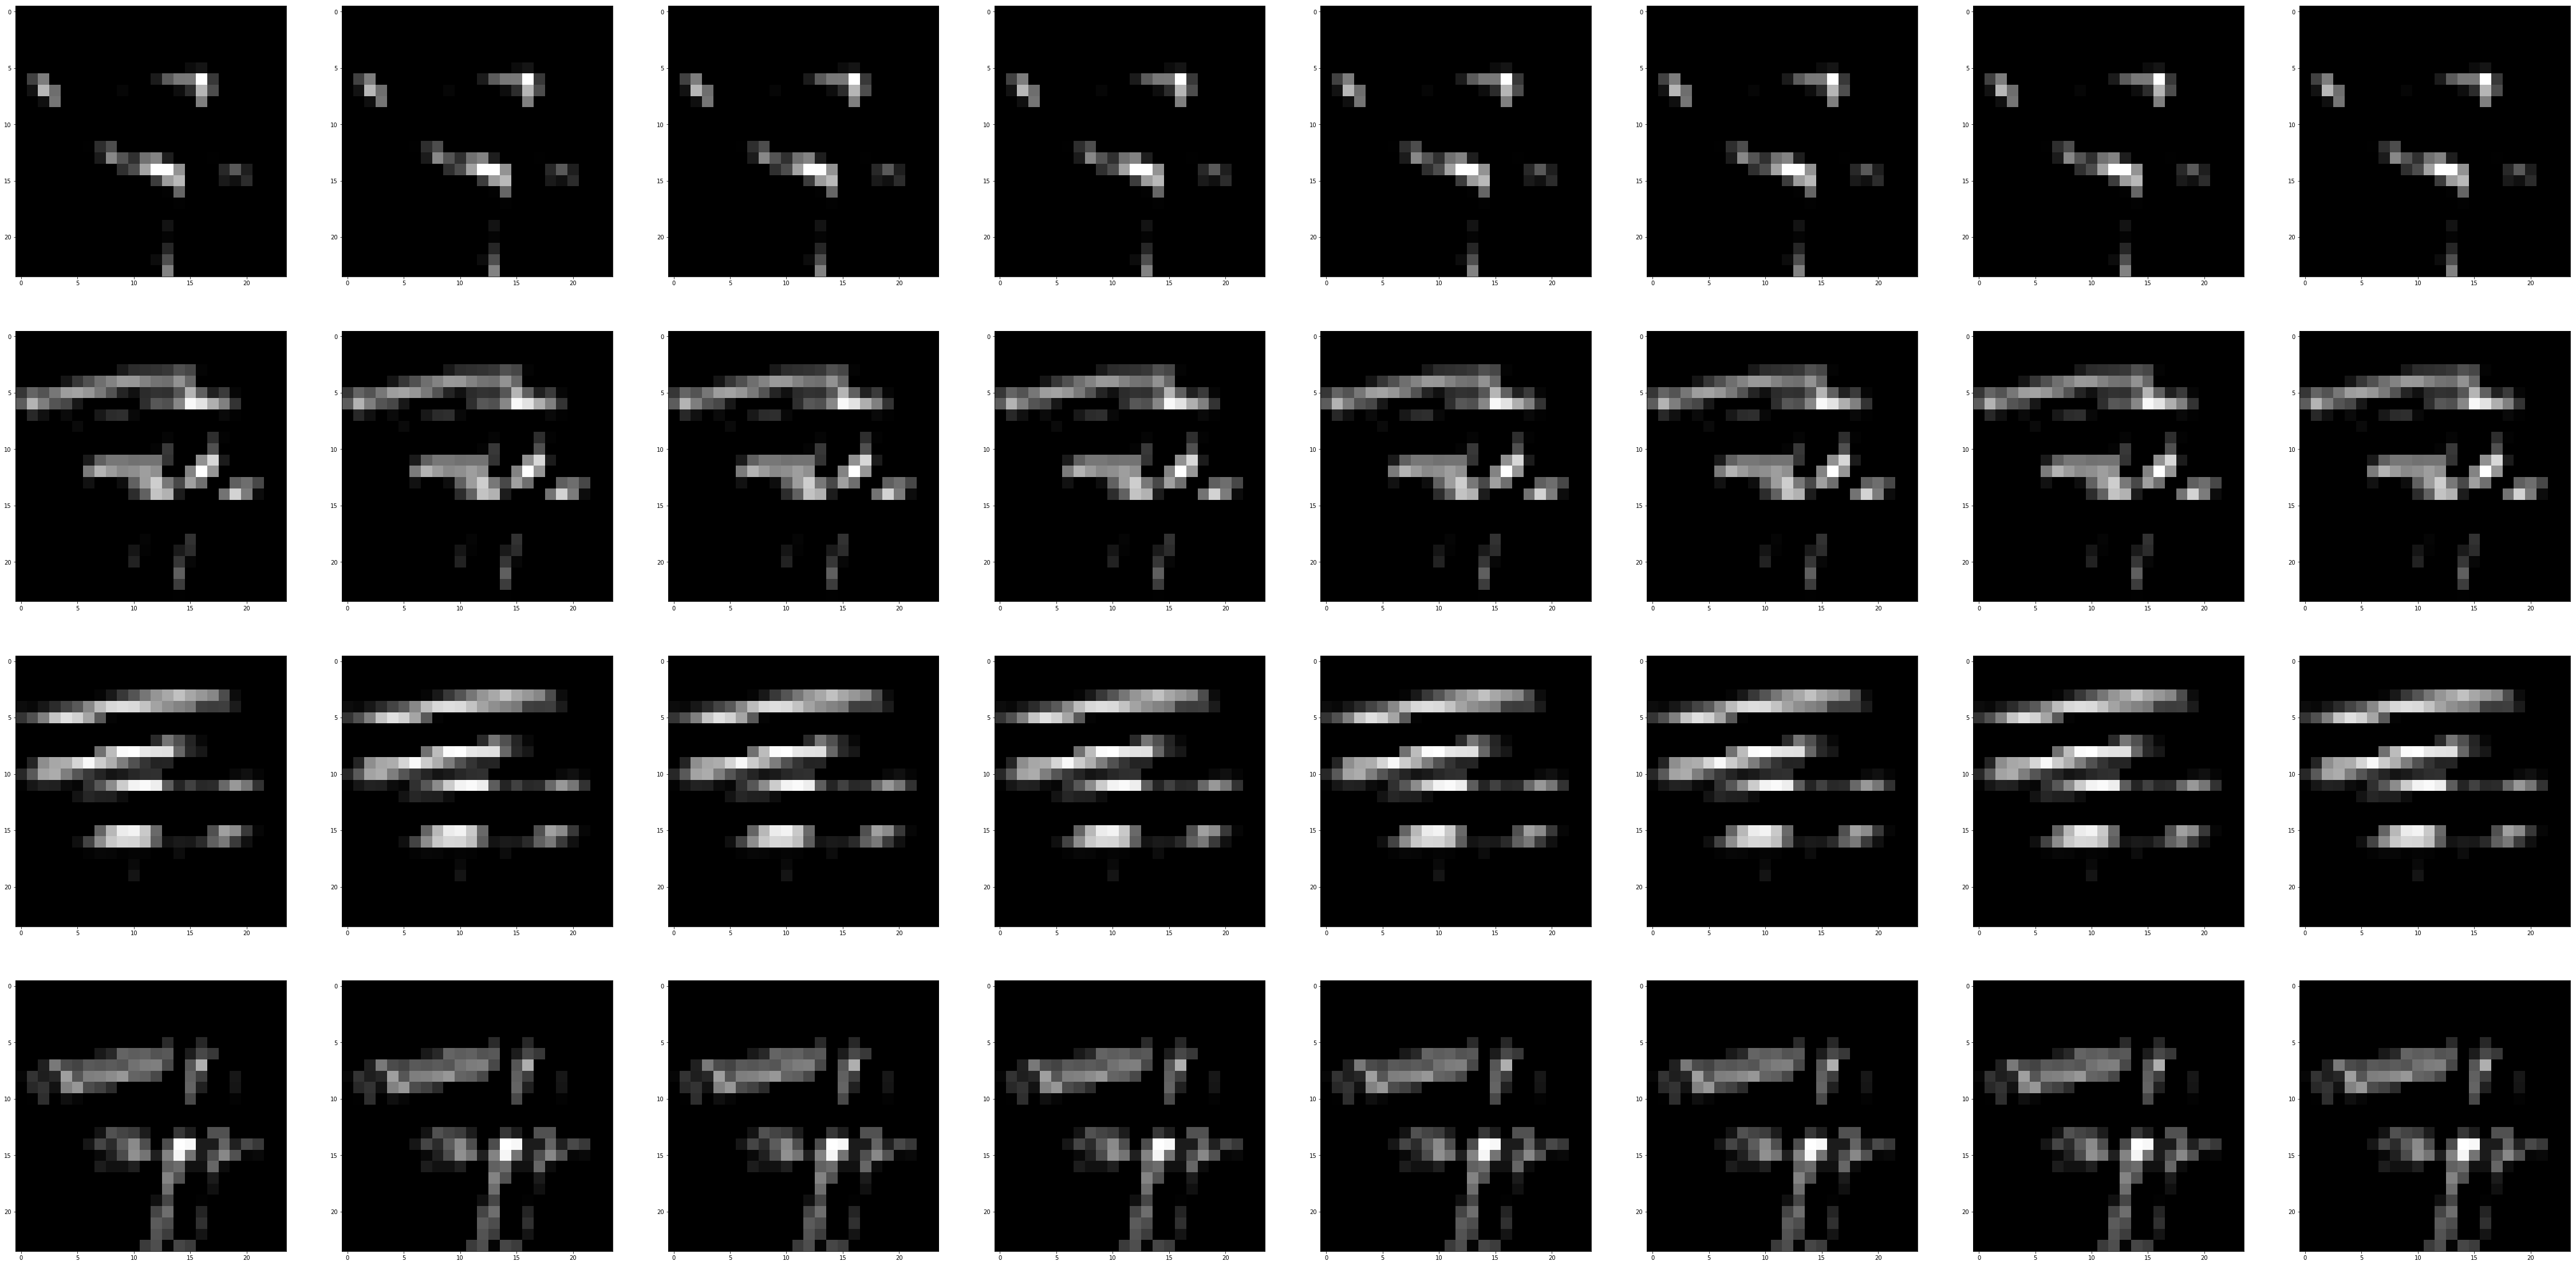

In [118]:
ind = 60
plt.imshow(X_test[ind].reshape(28,28), cmap = 'gray')
plt.show()
f, ax = plt.subplots(4,8, figsize = (80,40))
for i in range(4):
    for j in range(8):
        ax[i][j].imshow(first_layer_activation[ind, i, :, :], cmap = 'gray')
plt.show()